In [4]:
import numpy as np
df = np.load('DGraphFin/dgraphfin.npz')

df.files

['x',
 'y',
 'edge_index',
 'edge_type',
 'edge_timestamp',
 'train_mask',
 'valid_mask',
 'test_mask']

In [13]:
x = df['x'] # feature matrix for the nodes (users)
print("Shape of x (node features):", x.shape)  # (num_nodes, num_features)
print("Example node features (first 5 nodes):\n", x[:5])

Shape of x (node features): (3700550, 17)
Example node features (first 5 nodes):
 [[ 0.  5. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.]
 [ 0.  5. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.]
 [ 1.  5. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.]
 [ 1.  7. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1.]]


In [14]:
y = df['y']
print("Shape of y (node labels):", y.shape)  # (num_nodes,)
print("Unique labels:", np.unique(y))

Shape of y (node labels): (3700550,)
Unique labels: [0 1 2 3]


In [15]:
edge_index = df['edge_index'] # This is the edge list representing the directed relationships between users.
print("Shape of edge_index:", edge_index.shape)  # (2, num_edges)
print("First 5 edges:\n", edge_index[:, :5])

Shape of edge_index: (4300999, 2)
First 5 edges:
 [[ 476699 2915516]
 [ 347800 1271242]
 [ 154317 2104635]
 ...
 [1894383 1147595]
 [1895741 1314434]
 [1206795 2072636]]


In [16]:
edge_type = df['edge_type'] # This represents the type of each edge
print("Shape of edge_type:", edge_type.shape)  # (num_edges,)
print("Unique edge types:", np.unique(edge_type))

Shape of edge_type: (4300999,)
Unique edge types: [ 1  2  3  4  5  6  7  8  9 10 11]


In [17]:
edge_timestamp = df['edge_timestamp']
print("Shape of edge_timestamp:", edge_timestamp.shape)  # (num_edges,)
print("Earliest timestamp:", np.min(edge_timestamp))
print("Latest timestamp:", np.max(edge_timestamp))

Shape of edge_timestamp: (4300999,)
Earliest timestamp: 1
Latest timestamp: 821


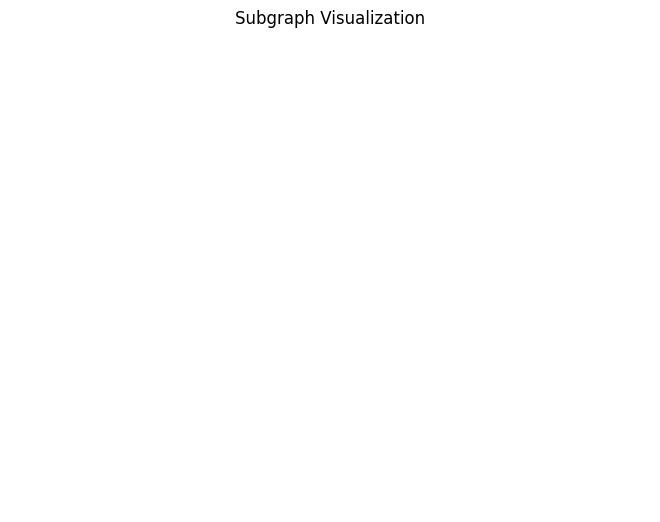

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

subgraph_nodes = 100
subgraph_edges = edge_index[:, edge_index[0] < subgraph_nodes]

G = nx.DiGraph()
G.add_edges_from(subgraph_edges.T)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Subgraph Visualization")
plt.show()